In [1]:
#imports
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

from PathFinder import find_path

In [2]:
#read data
PATH = find_path()

#select files
#files = ['application_train.csv','application_test.csv',]
files = ['preprocessed_train.csv', 'preprocessed_test.csv']
"""         
          'bureau.csv', 
         'bureau_balance.csv', 'credit_card_balance.csv',
         'installments_payments.csv', 'POS_CASH_balance.csv',
         'previous_application.csv']
"""
data_files=[]
data=[]
print("files used: {}".format(files))

#actually read files
for file in files:
    stuff = pd.read_csv(PATH+file,header=0,engine='python')
    #print(stuff)
    data_files.append(file)
    data.append(stuff)

files used: ['preprocessed_train.csv', 'preprocessed_test.csv']


In [3]:
#select and convert columns
original_train = data[0] #save the original because we'll need some stuff later
original_test = data[1]
app_train = data[0].copy()
app_test = data[1].copy()

#delete ID cols
del app_train['SK_ID_CURR']
del app_test['SK_ID_CURR']

app_train_y = app_train['TARGET']
new_cols_x = app_train.columns.values.tolist()
new_cols_x.remove('TARGET')
app_train_x = app_train[new_cols_x]

print('Training Features shape: ', app_train_x.shape) #235 cols
print('Testing Features shape: ', app_test.shape) #235 cols

Training Features shape:  (307511, 235)
Testing Features shape:  (48744, 235)


In [4]:
#apply logistic regression
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 2.7825594022071245, penalty='l2', random_state=20)

# Train on the training data
log_reg.fit(app_train_x, app_train_y)

LogisticRegression(C=2.7825594022071245, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=20,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [5]:
# Make predictions
# Make sure to select the second column only
log_reg_pred = log_reg.predict_proba(app_test)[:, 1]

In [6]:
# Submission dataframe
submit = original_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,SK_ID_CURR,TARGET
0,100001,0.053552
1,100005,0.215047
2,100013,0.044871
3,100028,0.027675
4,100038,0.135836


In [7]:
# Save the submission to a csv file
overwrite = False
if overwrite:
    submit.to_csv('results/log_reg_gridsearch_optimized.csv', index = False)

Submitted to kaggle  
score: 0.7363

In [10]:
#app_train_y
y_pred = log_reg.predict(app_train_x)
from sklearn.metrics import confusion_matrix
#sklearn.metrics.confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)
confusion_matrix(app_train_y, y_pred, labels=None, sample_weight=None)

array([[282401,    285],
       [ 24556,    269]], dtype=int64)

Confusion matrix, without normalization
[[282401    285]
 [ 24556    269]]
Normalized confusion matrix
[[1.   0.  ]
 [0.99 0.01]]


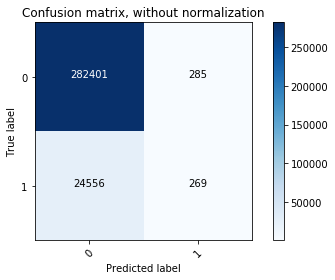

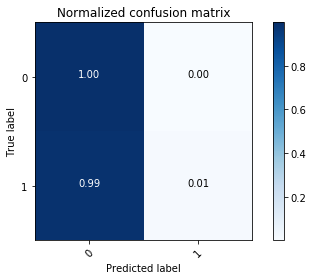

In [13]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
#cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix = confusion_matrix(app_train_y, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = ['0', '1']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [15]:
from sklearn.metrics import classification_report
report = classification_report(app_train_y, y_pred)
print(report)

             precision    recall  f1-score   support

          0       0.92      1.00      0.96    282686
          1       0.49      0.01      0.02     24825

avg / total       0.88      0.92      0.88    307511



In [19]:
data[0].columns.tolist()

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXP

In [18]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(data[0]['NAME_INCOME_TYPE'], edgecolor = 'k')
plt.title('Income Type'); plt.xlabel('Income Type'); plt.ylabel('Count');

KeyError: 'NAME_INCOME_TYPE'